In [14]:
import pandas as pd
import spacy
import collections
import matplotlib.pyplot as plt
import matplotlib

# 加载数据
df = pd.read_csv('reviews.csv')

# 创建一个spaCy模型
nlp = spacy.load('en_core_web_sm')

def extract_ngrams(doc, n):
    # 使用token的文本创建一个列表
    tokens = [token.text for token in doc]
    
    # 提取n-gram
    ngrams = zip(*[tokens[i:] for i in range(n)])
    
    return [" ".join(ngram) for ngram in ngrams]

# 对'text'列中的每个文本进行预处理，并提取2-gram
df['bigrams'] = df['text'].apply(lambda text: extract_ngrams(nlp(text), 2))

# 打印结果
print(df['bigrams'])

0       [I just, just do, do n't, n't understand, unde...
1       [25 October, October 2023, 2023 ;, ; I, I do, ...
2       [Poor merchant, merchant support, support ., ....
3       [Very frustrating, frustrating !, ! I, I do, d...
4       [Something wrong, wrong with, with the, the ap...
                              ...                        
2995    [I found, found out, out there, there is, is t...
2996    [When you, you are, are trying, trying to, to ...
2997    [like all, all othet, othet review, review ..,...
2998    [remove the, the pop, pop up, up everytime, ev...
2999    [Very lousy, lousy app, app ,, , customer, cus...
Name: bigrams, Length: 3000, dtype: object


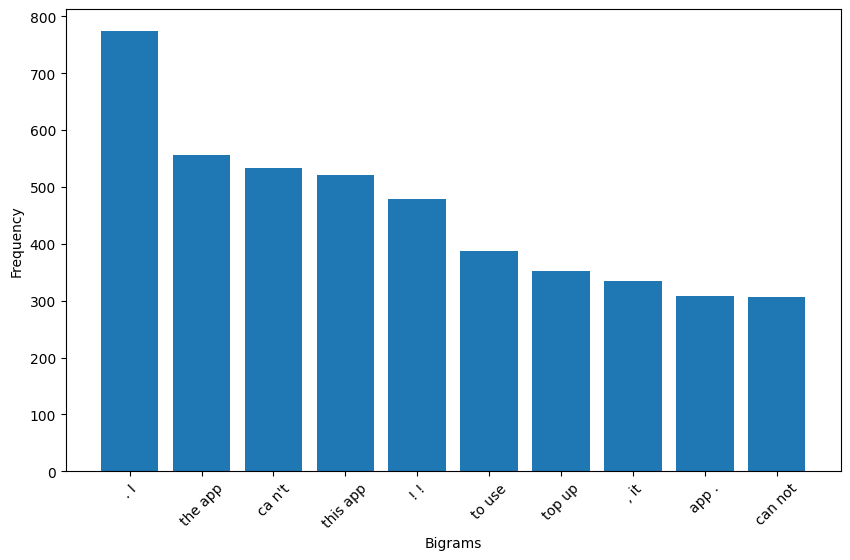

In [22]:
# 将所有的bigrams合并到一个列表中
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]

# 计算bigram的频率
counter = collections.Counter(all_bigrams)

# 找到出现最多的前10个bigram
most_common_bigrams = counter.most_common(10)

# 创建一个条形图
plt.figure(figsize=(10, 6))  # 设置图像大小
plt.bar([val[0] for val in most_common_bigrams], [val[1] for val in most_common_bigrams])
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # 设置x轴标签旋转角度
plt.show()